**MINST Digit classification using Deep Learning (Neural Network)**

Importing Dependencies

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the minst data from keras.datasets

In [30]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [31]:
type(X_train)

numpy.ndarray

In [32]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


*Training Data=60000\
*Testing Data=10000\
*Image Dimenstion=28x28\
*Gray Scale image=1 channel

In [33]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [34]:
print(X_train[10].shape)

(28, 28)


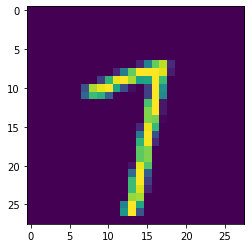

7


In [35]:
#Displaying the image
plt.imshow(X_train[42])
plt.show()

#print the corresponding model
print(Y_train[42])

Image labels

In [36]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [37]:
#unique value of Y train
print(np.unique(Y_train))

#unique value of Y test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the image has same dimention of datasets . if not ,convert and reszie of common dimention

In [38]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [39]:
#printing the 12th image
print(X_train[12])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [40]:
#seting up the layer of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   #output
])

In [41]:
#Compiling the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
#trainig the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0998 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training Data Accuracy=98.9

Accuracy on Test Data

In [43]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.9665
0.9664999842643738


Total Data Accuracy=97.3

In [44]:
print(X_test.shape)

(10000, 28, 28)


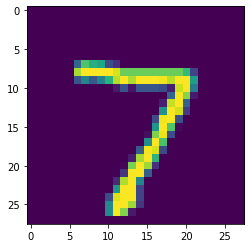

In [45]:
#first data point in x_test
plt.imshow(X_test[0])
plt.show()

In [46]:
print(Y_test[0])

7


In [47]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [48]:
print(Y_pred.shape)

(10000, 10)


In [49]:
print(Y_pred[0])

[1.17150997e-03 4.83019978e-01 8.39301586e-01 3.50693256e-01
 1.34047790e-04 1.30703067e-03 1.46864238e-07 9.99999166e-01
 1.00751985e-02 2.34545977e-03]


model.predict() gives the prediction probability of each class for that data points

In [50]:
#converting the prediction probability to the class model
label_for_first_test_image=np.argmax(Y_pred[0]) 
print(label_for_first_test_image)

7


In [51]:
#converting the prediction probability to class labels for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test=True label\
Y_pred_labels=predicted lavel\


Confusion matrix

In [52]:
con_mat=confusion_matrix(Y_test,Y_pred_labels)

In [53]:
print(con_mat)

tf.Tensor(
[[ 962    0    0    1    0    3    2    1   10    1]
 [   0 1123    1    1    0    2    1    0    7    0]
 [   1    4  995    3    3    2    1    7   15    1]
 [   0    0    5  965    1   24    0    4    8    3]
 [   1    1    2    0  953    7    6    0    3    9]
 [   3    0    0    2    2  878    2    1    4    0]
 [   3    2    0    0    5   20  920    0    8    0]
 [   1   10    5    5    2    0    0  992    8    5]
 [   1    0    2    4    6    8    0    3  949    1]
 [   3    3    0    9   27   11    1   11   15  929]], shape=(10, 10), dtype=int32)


Text(114.0, 0.5, 'True lables')

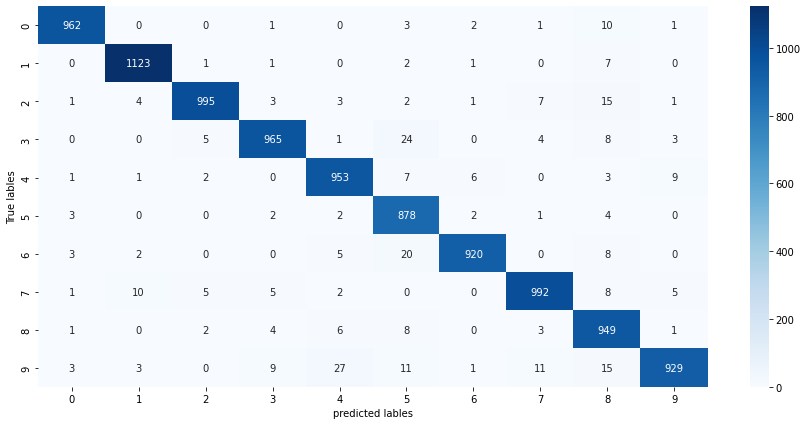

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted lables')
plt.ylabel('True lables')

Building Predictive System

Path of image will be predicted :/content/download.png


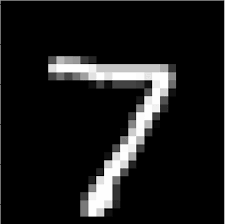

1/1 [==============================] - 0s 14ms/step
Handwritten is recognise as : 7


In [55]:
input_image_path=input('Path of image will be predicted :')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('Handwritten is recognise as :',input_pred_label)

